In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df=pd.read_csv('/mnt/nvme2tb/ffp/results/bestmodels/test/hypres_tf_ns_ncv_2019_all_test_2.csv')

In [19]:
df.columns

Index(['Model ID', 'opt. metric', 'training set', 'test set', 'accuracy train',
       'precision 1 train', 'recall 1 train', 'f1-score 1 train',
       'precision 0 train', 'recall 0 train', 'f1-score 0 train', 'auc train',
       'TN train', 'FP train', 'FN train', 'TP train', 'accuracy test',
       'precision 1 test', 'recall 1 test', 'f1-score 1 test',
       'precision 0 test', 'recall 0 test', 'f1-score 0 test', 'auc test',
       'TN test', 'FP test', 'FN test', 'TP test', 'FN01 test', 'FN02 test',
       'FN001 test', 'FN002 test', 'early stop epochs', 'params',
       'CV Fit and predict min.'],
      dtype='object')

In [20]:
dffilt=df[['Model ID', 'opt. metric', 'test set', 'recall 1 test', 'recall 0 test', 'params' ]]

In [21]:
dffilt[dffilt['test set'].str.contains('all')]

,Model ID,opt. metric,test set,recall 1 test,recall 0 test,params
4,923,hybrid5 test,all set,0.898331,0.787437,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
9,875,hybrid5 test,all set,0.904401,0.773437,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
14,555,hybrid5 test,all set,0.908953,0.771941,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
19,786,NH10 test,all set,0.936267,0.753004,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
24,379,NH10 test,all set,0.948407,0.714011,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
29,137,NH10 test,all set,0.966616,0.681698,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
34,785,hybrid2 test,all set,0.886191,0.811678,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
39,366,hybrid2 test,all set,0.852807,0.832309,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."
44,686,hybrid2 test,all set,0.895296,0.793061,"{'ES_mindelta': 0.002, 'ES_monitor': 'val_loss..."


In [73]:
dfscs=[]
for i in range(6,10):
    dftemp=pd.read_csv('/mnt/nvme2tb/ffp/results/bestmodels/test/hypres_tf_ns_ncv_2019_scores_hybrid2test_1_20190%ddf_normcsv.csv'%i)
    dftemp=dftemp[['y','1']]
    dfscs+=[dftemp]
    

In [136]:
def getbin(distrib, percent, hist, binedges):
    binedges1=binedges[:-1] # match histogram array
    numelements=int(len(distrib)*percent)+1 # compute number of elements for cut off likelihood
    binlim=binedges1[np.cumsum(hist)<numelements][-1] # get cut off likelihood
    return binlim

In [74]:
dfsc=pd.concat(dfscs)

In [75]:
dfsc

,y,1
0,0.0,0.000050
1,0.0,0.000192
2,0.0,0.000176
3,0.0,0.000112
4,0.0,0.000093
...,...,...
19678921,0.0,0.704708
19678922,0.0,0.851876
19678923,0.0,0.757222
19678924,0.0,0.420057


In [193]:
plotfiredistrib=dfsc[dfsc['y']==1]['1'].values
plotalldistrib=dfsc['1'].values

In [205]:
binedges=be
hist=h
binedges1=binedges[:-1] # match histogram array
distrib=plotfiredistrib
percent=0.005
numelements=int(len(distrib)*percent)+1 # compute number of elements for cut off likelihood
binlim=binedges1[np.cumsum(hist)<numelements][-1] # get cut off likelihood
binlim

0.052360608171

In [192]:
getbin(plotfiredistrib, 0, h, be)

IndexError: index -1 is out of bounds for axis 0 with size 0

In [270]:
firepercents=[0.005,0.05,0.20,0.55]
h, be = np.histogram(plotfiredistrib, bins=1000)
binscust=[]
for fp in firepercents:
    binscust+=[getbin(plotfiredistrib, fp, h, be)]
binscust=[0]+binscust+[1]
    

In [274]:
binscust

[0, 0.052360608171, 0.270555242059, 0.67285159829, 0.8910462321779999, 1]

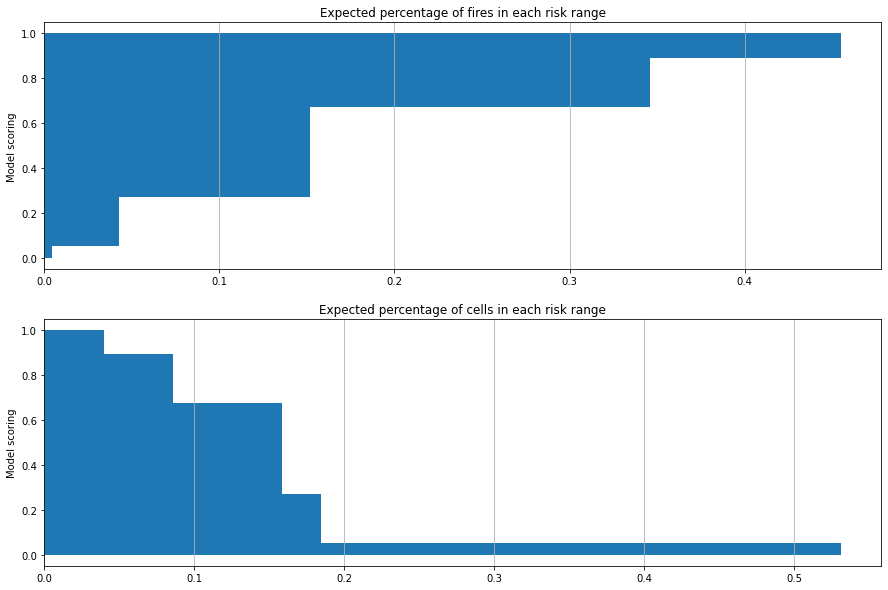

In [273]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
#ax[0].hist(plotfiredistrib, bins=binscust)
ax[0].title.set_text('Expected percentage of fires in each risk range')
ax[0].hist(plotfiredistrib, bins=binscust, weights=np.ones(len(plotfiredistrib)) / len(plotfiredistrib),
          orientation='horizontal')
#ax[2].hist(plotalldistrib, bins=binscust)
ax[1].title.set_text('Expected percentage of cells in each risk range')
ax[1].hist(plotalldistrib, bins=binscust, weights=np.ones(len(plotalldistrib)) / len(plotalldistrib),
          orientation='horizontal')
for i in range(2):
    ax[i].grid(axis='x')
    ax[i].set_ylabel('Model scoring')
    #ax[i].set_xlabel('histogram percent')
plt.show()

In [209]:
len(plotfiredistrib)*0.01, len(plotfiredistrib)*0.05, len(plotfiredistrib)*0.10

(6.59, 32.95, 65.9)

In [95]:
np.histogram(plotfiredistrib, bins=[0,0.08,1])

(array([  7, 652]), array([0.  , 0.08, 1.  ]))

In [49]:
len(plotalldistrib)

19656353

In [155]:
np.histogram(plotalldistrib, bins=[0]+bins+[1])

(array([44493592, 18441059,  8591126,  3937682,  3809821]),
 array([0.        , 0.07086819, 0.4527088 , 0.747856  , 0.87156457,
        1.        ]))

In [59]:
np.histogram(plotfiredistrib, bins=[0.02,0.1,0.3,0.6,0.85,1])

(array([  4,  19,  26,  94, 214]), array([0.02, 0.1 , 0.3 , 0.6 , 0.85, 1.  ]))

In [145]:
h, be = np.histogram(plotfiredistrib, bins=1000)

In [131]:
int(len(plotfiredistrib)*0.01)+1

7

In [134]:
be[:-1][np.cumsum(h)<int(len(plotfiredistrib)*0.01)+1][-1]

0.05917919048

In [133]:
be

array([0.02021586, 0.02995669, 0.03969753, 0.04943836, 0.05917919,
       0.06892002, 0.07866085, 0.08840169, 0.09814252, 0.10788335,
       0.11762418, 0.12736501, 0.13710585, 0.14684668, 0.15658751,
       0.16632834, 0.17606917, 0.18581   , 0.19555084, 0.20529167,
       0.2150325 , 0.22477333, 0.23451416, 0.244255  , 0.25399583,
       0.26373666, 0.27347749, 0.28321832, 0.29295916, 0.30269999,
       0.31244082, 0.32218165, 0.33192248, 0.34166331, 0.35140415,
       0.36114498, 0.37088581, 0.38062664, 0.39036747, 0.40010831,
       0.40984914, 0.41958997, 0.4293308 , 0.43907163, 0.44881247,
       0.4585533 , 0.46829413, 0.47803496, 0.48777579, 0.49751662,
       0.50725746, 0.51699829, 0.52673912, 0.53647995, 0.54622078,
       0.55596162, 0.56570245, 0.57544328, 0.58518411, 0.59492494,
       0.60466578, 0.61440661, 0.62414744, 0.63388827, 0.6436291 ,
       0.65336993, 0.66311077, 0.6728516 , 0.68259243, 0.69233326,
       0.70207409, 0.71181493, 0.72155576, 0.73129659, 0.74103

In [113]:
be

array([0.02021586, 0.02118995, 0.02216403, ..., 0.99235088, 0.99332497,
       0.99429905])

In [123]:
h[be[:-1]<=0.06892002235]

array([2, 1, 0, 1, 1, 2])

In [146]:
getbin(plotfiredistrib, 0.01, h, be)

0.070868188724

In [147]:
h

array([ 1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1

In [148]:
be

array([0.02021586, 0.02118995, 0.02216403, ..., 0.99235088, 0.99332497,
       0.99429905])